<a href="https://colab.research.google.com/github/southzyzy/ICT1005_Stats_with_Pandas/blob/master/Assignment1_Usage_of_Mobile_Devices_for_Media_Activities.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Done By:

---

Tan Zhao Yea

Stanley Cheong

Elger Tay

Lee Yi Yang

Ong Weijie

# **STEP 2: START THE NOTEBOOK**

---



In [0]:
import pandas as pd
import numpy as np

In [0]:
# import data from google drive
from google.colab import drive
drive.mount('/content/gdrive', force_remount= True)

In [0]:
# read the csv file as a dataframe
df = pd.read_csv("/content/gdrive/My Drive/DataICT1005/usage-of-mobile-devices-for-media-activities.csv", encoding="iso-8859-1")
# Renaming the column name
df.rename(columns={"ever_used": "ever_used_percen"}, inplace=True)

**How many columns and rows are there ?**

---



In [0]:
df.shape

(234, 5)

**Elements of the table**

---



In [0]:
df

**What are the column names**

---



In [0]:
df.columns

Index(['year', 'age', 'media_activity', 'sample_size', 'ever_used_percen'], dtype='object')

**Variable Categorical & Numerical **

---
Year - Categorical: Ordinal

Age - Categorical: Ordinal

Media Activity - Categorical: Nominal

Sample Size - Numerical: Discrete

Ever Used Percen - Numerical: Discrete

In [0]:
# Check the datatype of columns
df.<column_name>.dtype

# STEP 3: CLEANING OF DATA

---



In [0]:
# Turn year and age into categorical
df['year'] = df.year.astype('str')
df['age'] = df.age.astype('str')

# Formatting of data to change it to numeric
df['sample_size'] = pd.to_numeric(df['sample_size'], errors='coerce')
df['ever_used_percen'] = pd.to_numeric(df['ever_used_percen'], errors='coerce')

# Get the count of the ever_used of the sample_size
df['ever_used_count'] = (df['ever_used_percen'] / 100) * df['sample_size']
df['ever_used_count'] = df['ever_used_count'].apply(np.floor)
df['ever_used_count'] = pd.to_numeric(df['ever_used_count'], errors='coerce')

**Summary Statistics**

---



In [0]:
df.describe()

,year,sample_size,ever_used_percen,ever_used_count
count,234.000000,234.000000,234.000000,234.000000
mean,2014.000000,303.722222,14.809402,46.145299
std,0.818247,103.917782,21.844041,74.717639
min,2013.000000,141.000000,0.000000,0.000000
25%,2013.000000,179.000000,1.600000,4.250000
50%,2014.000000,346.500000,5.900000,16.500000
75%,2015.000000,395.000000,17.175000,48.750000
max,2015.000000,422.000000,96.200000,379.000000


# STEP 4: PLOTTING OF DATA

---



In [0]:
import matplotlib.pyplot as plt

## Quantitative Variables

---



**Histogram**

---



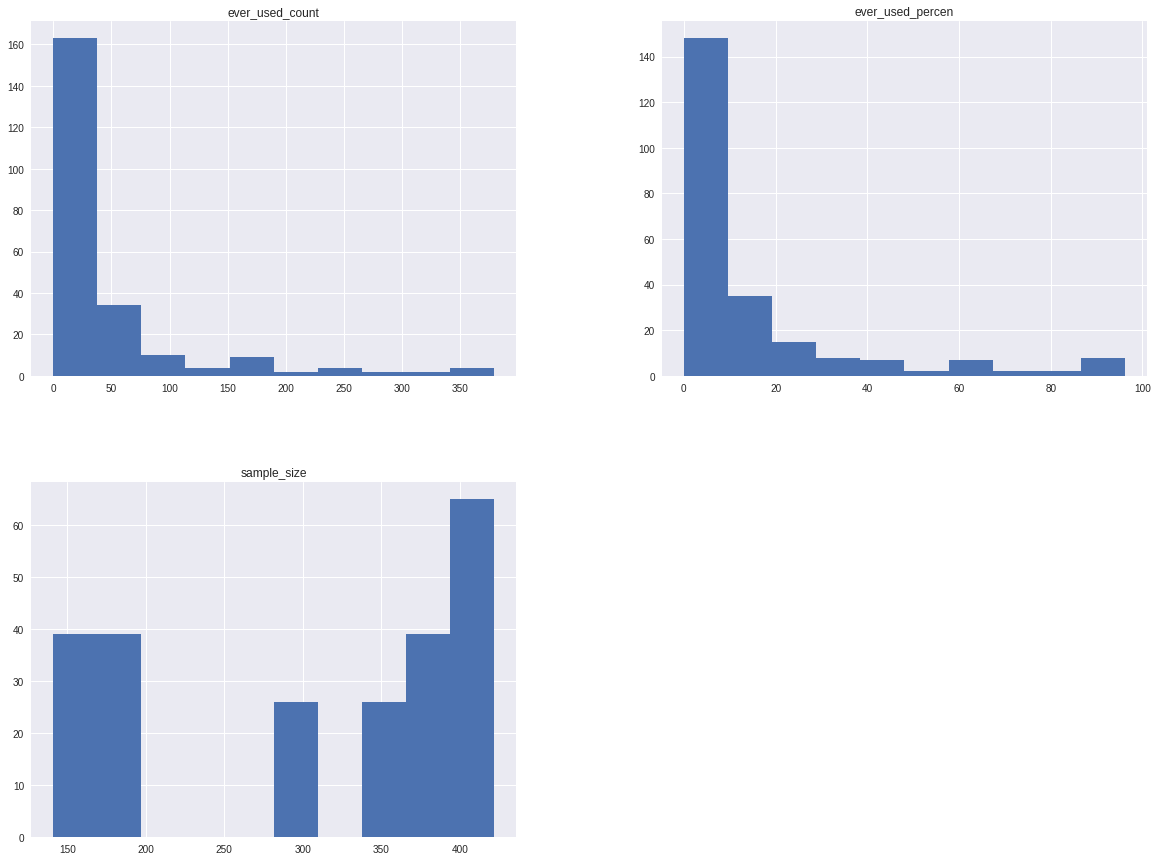

In [0]:
hist_plot = df.hist(column=['sample_size', 'ever_used_percen','ever_used_count'], figsize=(20,15))

**Boxplot**

---



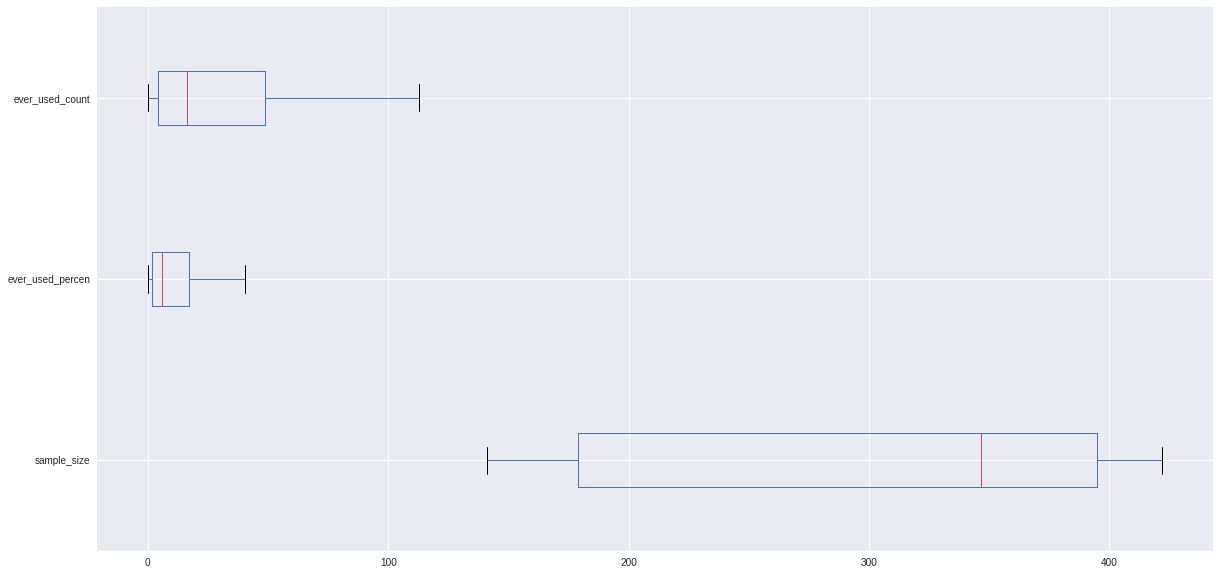

In [0]:
box_plot = df.boxplot(vert=False, column=['sample_size', 'ever_used_percen','ever_used_count'], figsize=(20,10))

## Categorical Plotting

---



**Bar Chart**

---

1. First bar chart shows the total count of mobile devices on each media activities over the years


*   Ever Used Count as the X-Axis
*   Media Activity as Y-Axis


2. Second bar chart shows the total count of mobile devices on media activities every year


*   Year as the X-Axis
*   Ever Used Count as the Y-Axis


3. Last bar chart shows the total count of mobile devices on meadia activities by Age over the years 


*   Age as the X-Axis
*   Ever Used Count as the Y-Axis



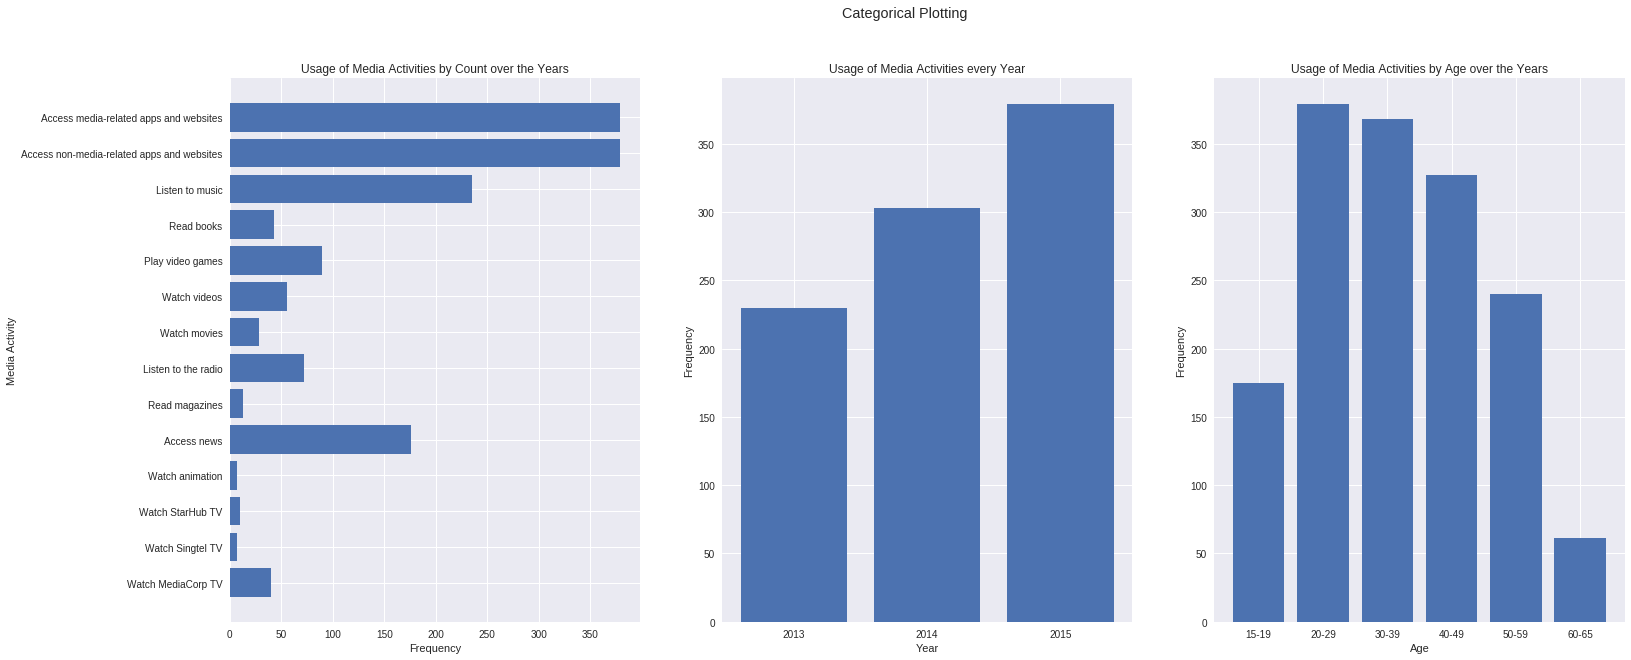

In [0]:
x = df['ever_used_count'] # x-axis for frequency
year = df['year'] # y-axis for the year
media = df['media_activity'] # y-axis for the media
age = df['age'] # y-axis for the age

fig, axs = plt.subplots(1, 3, figsize=(25, 10)) # create the subplots array with lenth of 3
axs[0].barh(media, x) # construct the honrizontal bar chart
axs[0].set_xlabel('Frequency') # specify the x axis label
axs[0].set_ylabel('Media Activity') # specify the y-axis label
axs[0].set_title('Usage of Media Activities by Count over the Years') # specify the title of the graph

axs[1].bar(year, x) # construct the bar chart
axs[1].set_xlabel('Year') # specify the x axis label 
axs[1].set_ylabel('Frequency') # specify the y axis label
axs[1].set_title('Usage of Media Activities every Year') 

axs[2].bar(age, x)
axs[2].set_xlabel('Age')
axs[2].set_ylabel('Frequency')
axs[2].set_title('Usage of Media Activities by Age over the Years')

fig.suptitle('Categorical Plotting')
plt.show()

# STEP 5: SELECTORS AND GROUPING

---



**Groupby**

---



In [0]:
df.groupby(['age', 'year'])['ever_used_count'].sum()

**Bar Chart**

---

The bar chart plotted shows the total count of mobile device usage every year by the age of the dataset. 

The purpose is to find in each year, what is the total usage in different age group.


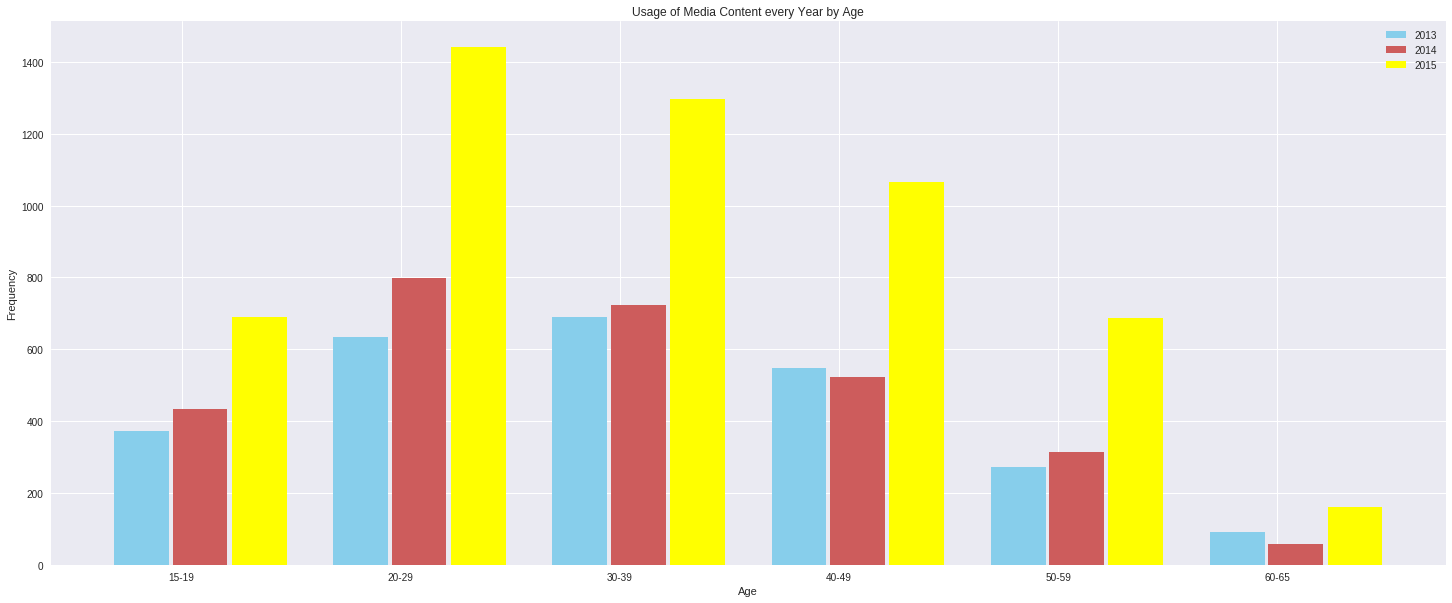

In [0]:
age = df['age'].unique() # get all the age

year2013 = df.loc[df['year'].isin(['2013']) & df['ever_used_count'] > 0].groupby(['age'])['ever_used_count'].sum().tolist() # getting the sum of the count where it is more than 0 and year = 2013 to list
year2014 = df.loc[df['year'].isin(['2014']) & df['ever_used_count'] > 0].groupby(['age'])['ever_used_count'].sum().tolist() # getting the sum of the count where it is more than 0 and year = 2014 to list
year2015 = df.loc[df['year'].isin(['2015']) & df['ever_used_count'] > 0].groupby(['age'])['ever_used_count'].sum().tolist() # getting the sum of the count where it is more than 0 and year = 2015 to list

ind = np.arange(len(age))  # the x locations for the groups
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(25, 10))
rects1 = ax.bar(ind - width/3 - 0.1, year2013, width, color='SkyBlue', label='2013') # populate the axis for year 2013
rects2 = ax.bar(ind + width/3, year2014, width, color='IndianRed', label='2014') # populate the axis for year 2014
rects2 = ax.bar(ind + width/3 + width + 0.02, year2015, width, color='Yellow', label='2015') # populate the axis for year 2015

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Frequency') # specify the y - axis
ax.set_title('Usage of Media Content every Year by Age') # set the title
ax.set_xticks(ind) # indicate the size of the x axis
ax.set_xticklabels(age) # set the values of the x axis
ax.set_xlabel('Age') # specify the age
ax.legend() # display the legend
plt.show() # show the graph

**Correlation and Final Plot**

---

In [0]:
df.corr()

,sample_size,ever_used_percen,ever_used_count
sample_size,1.000000,0.072423,0.256546
ever_used_percen,0.072423,1.000000,0.936450
ever_used_count,0.256546,0.936450,1.000000


**Correlations to report**:

The sample size refers to the number of people using mobile devices and the ever_used_count refers to how many people in that sample size has used these mobile devices to access media activites. The ever_used_percentage refers to how many people have used these mobile devices to access media activites out of the total number of people with a mobile device.

In this table, we can see that when the sample size increase, the ever_used_count will also increase, but not at an equal rate as the sample size. This is because when more people have access to mobile devices, it is natural that the number of people that use the mobile devices for media activities will increase. We can also see that the ever_used_percentage also increase but at a significantly lower rate. This is due to the fact that it is a percentage and it is based on the number of people using mobile devices for media activities and the total sample size.

Lastly, we can see in the table that when the percentage increase, the ever_used_count will also increase at a similar rate due to the percentage representing the number of ever_used_count out of the sample size.